In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from icecream import ic

# Data Loading

In [3]:
from data.file_loading import load_data

possible_keys = ['msciworld','msciem', 'bs_key']
for key in possible_keys:
    try:
        load_data(key)
        print(f'{key} successfully loaded.')
    except Exception as e:
        print(e)

msciworld successfully loaded.
msciem successfully loaded.
'bs_key is not a valid key.'


# Investments

In [4]:
from investmentclasses import Share
share_world = Share('msciworld', 0.7)
share_em = Share('msciem', 0.3)

# Trigger

In [5]:
from triggers import TimeTrigger, TimeUnit, DeviationTrigger, DeviationType
from datetime import datetime, date
from propagation import Portfolio
from rebalancer import Rebalancer

time = TimeTrigger(TimeUnit.MONTHS, 7, date(2018,7,1))
port = None
DATE_FORMAT = "%d.%m.%Y"
test_date_pre = datetime.strptime('01.12.2017', DATE_FORMAT).date() 
test_date_at = datetime.strptime('01.07.2018', DATE_FORMAT).date() 
test_date_post = datetime.strptime('01.02.2019', DATE_FORMAT).date() 
test_date_false = datetime.strptime('01.06.2017', DATE_FORMAT).date() 

ic(time.check_trigger(test_date_pre, port))
ic(time.check_trigger(test_date_at, port))
ic(time.check_trigger(test_date_post, port))
ic(time.check_trigger(test_date_false, port))

deviat = DeviationTrigger(DeviationType.RELATIVE, 0.3)

ic| time.check_trigger(test_date_pre, port): True
ic| time.check_trigger(test_date_at, port): True
ic| time.check_trigger(test_date_post, port): True
ic| time.check_trigger(test_date_false, port): False


# Rebalancer

In [6]:
from rebalancer import Rebalancer
rebalancer = Rebalancer()
rebalancer.add_trigger(time)

# Portfolio

In [9]:
from propagation import Portfolio
from datetime import datetime
assets = [share_world, share_em]
portfolio = Portfolio(assets, rebalancer=rebalancer, initial_cash=10000)
DATE_FORMAT = "%d.%m.%Y"
start_date = datetime.strptime('01.01.2018', DATE_FORMAT).date() 
end_date = datetime.strptime('01.01.2019', DATE_FORMAT).date() 

portfolio.simulate_timeinterval(start_date, end_date)
print(portfolio.combined_order_history)
print(portfolio.cash_position)
#TODO: cashposition not 0

[HistoryOrder(key_name='msciworld', date=datetime.date(2018, 7, 1), amount=117.83130582386937, order_price=59.3832, fees=1.0, tax=0), HistoryOrder(key_name='msciem', date=datetime.date(2018, 7, 1), amount=62.156405258877925, order_price=48.24603333333334, fees=1.0, tax=0)]
2.0000000000004547


# Visualisation

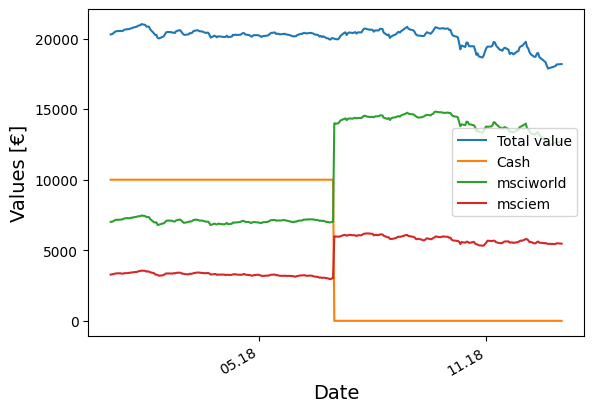

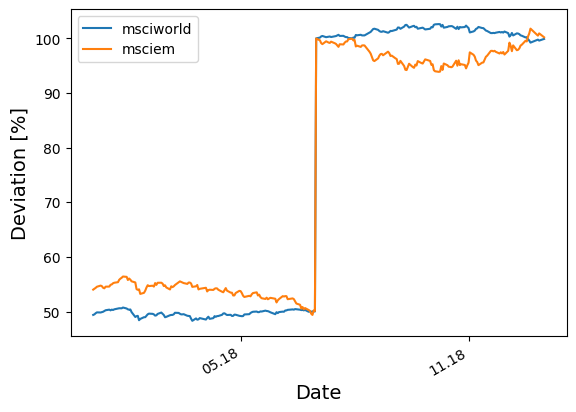

In [10]:
from visualisation import *
plot_value_history(portfolio)
plot_deviation_history(portfolio)